<a href="https://colab.research.google.com/github/dsubham/VAE/blob/main/VAE_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the input data
x_train = x_train / 255.
# Reshape the input data to have an additional batch dimension
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
input_dim = 28*28
hidden_dim = 512
latent_dim = 128

In [3]:
encoder_input = tf.keras.Input(shape=(input_dim,))
encoder_hidden = tf.keras.layers.Dense(hidden_dim, activation='relu')(encoder_input)
latent = tf.keras.layers.Dense(latent_dim)(encoder_hidden)
encoder = tf.keras.Model(encoder_input, latent)

In [4]:
decoder_input = tf.keras.Input(shape=(latent_dim,))
decoder_hidden = tf.keras.layers.Dense(hidden_dim, activation='relu')(decoder_input)
decoder_output = tf.keras.layers.Dense(input_dim)(decoder_hidden)
decoder = tf.keras.Model(decoder_input, decoder_output)

In [5]:
inputs = tf.keras.Input(shape=(input_dim,))
latent = encoder(inputs)
outputs = decoder(latent)
vae = tf.keras.Model(inputs, outputs)

In [6]:
len(x_train)

60000

In [7]:
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

num_epochs = 1
for epoch in range(num_epochs):

  print(epoch)

  for x in x_train[:1000]:

    x = x[tf.newaxis, ...]

    with tf.GradientTape() as tape:

      reconstructed = vae(x)
      loss = loss_fn(x, reconstructed)


    grads = tape.gradient(loss, vae.trainable_variables)
    optimizer.apply_gradients(zip(grads, vae.trainable_variables))

  print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.numpy():.4f}')

0
Epoch 1/1, Loss: 1.8765


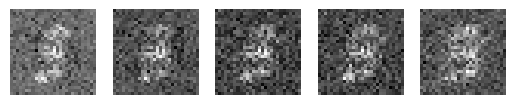

In [8]:
# Generate samples
latent_samples = tf.random.normal(shape=(5, latent_dim))
generated_samples = decoder(latent_samples)

# Plot the generated samples
import matplotlib.pyplot as plt

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(generated_samples[i].numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

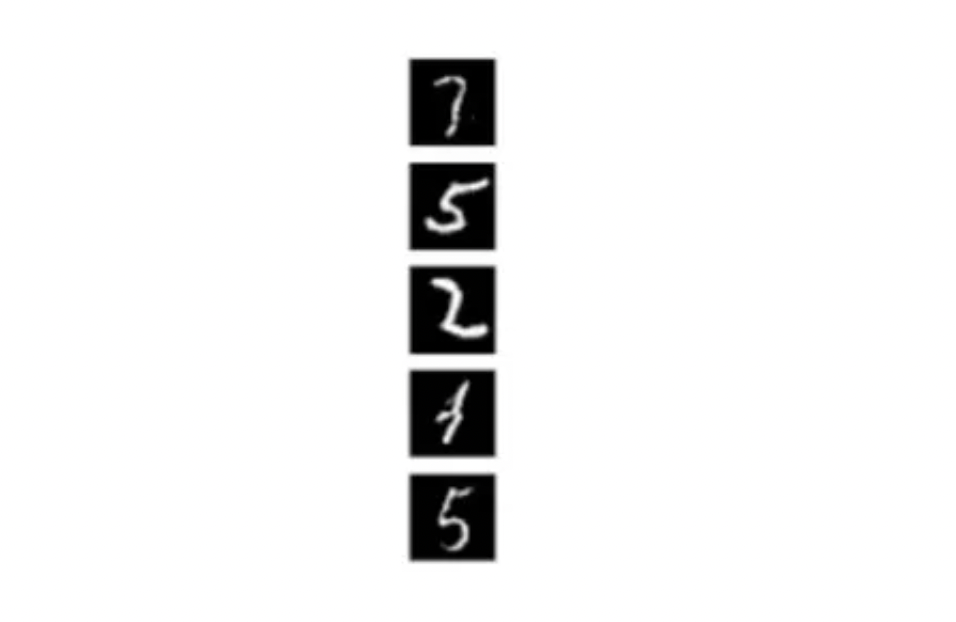

In [ ]:
import tensorflow as tf
from sklearn.manifold import TSNE


latent_vectors = encoder(x_train).numpy()


latent_2d = TSNE(n_components=2).fit_transform(latent_vectors)

# Ploting latent space
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.show()

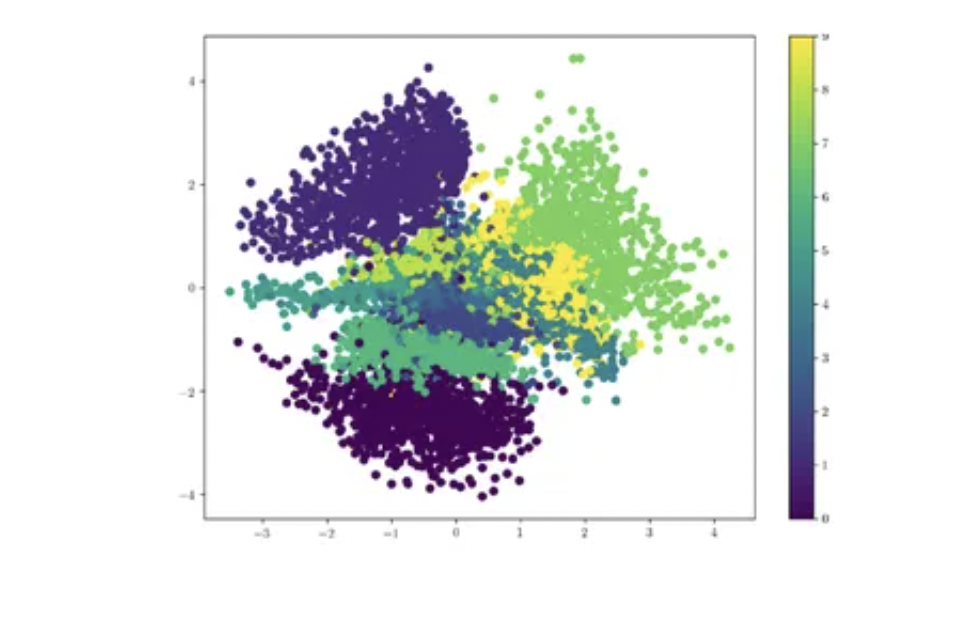

*Credits:

https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73

https://www.analyticsvidhya.com/blog/2023/07/an-overview-of-variational-autoencoders/